# Moving Averages 

Link about EWMA and SMA : https://school.stockcharts.com/doku.php?id=technical_indicators:moving_averages

In [1]:
## Install Pandas Data Reader
# !pip install pandas-datareader

from pandas_datareader import data as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf
yf.pdr_override()

In [3]:
df_tesla = pdr.get_data_yahoo('TSLA')

c:\Users\Ateeth Arun\Anaconda\envs\time-series-env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


### Simple Moving Average

Same as rolling() function and is used for smoothening the graph

<Axes: xlabel='Date'>

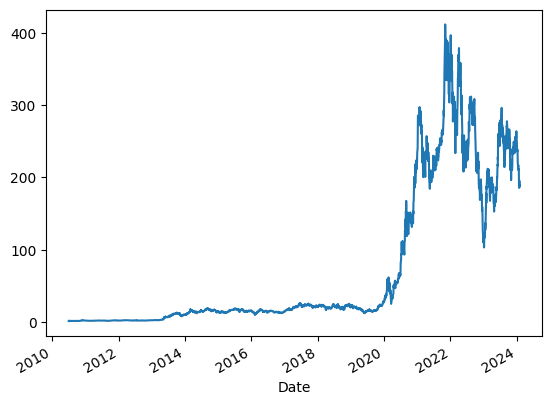

In [4]:
df_tesla['Open'].plot()

In [5]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(
    window=10,
    min_periods=1
    ).mean()
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(
    window=30,
    min_periods=1
    ).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(
    window=50,
    min_periods=1
    ).mean()

min_period = 1 is to remove the NaN values for initial values within the rolling window

In [6]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling,Open:30 days rolling,Open:50 days rolling
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667,1.266667,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000,1.493000,1.493000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.550889,1.550889,1.550889
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.546500,1.546500,1.546500
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.503867,1.503867,1.503867


<Axes: xlabel='Date'>

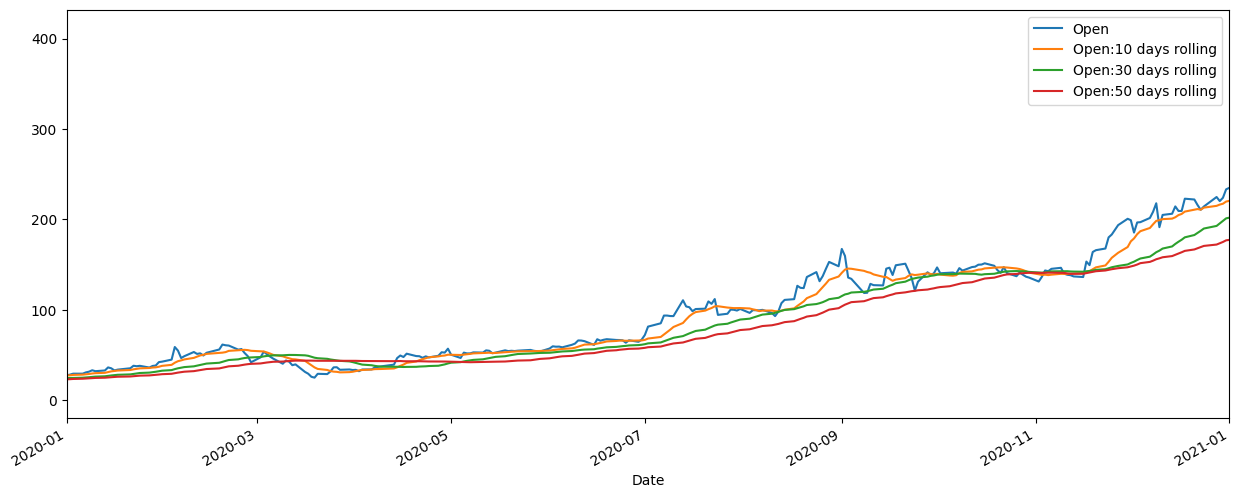

In [7]:
df_tesla[['Open' , 'Open:10 days rolling', 'Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

#### Disadvantage Simple Moving Average

**Similar importance to all the data but time series we need to give more weight to recent data which will be provided in Exponential Weight Moving Average**

### Cummulative Moving Average (CMA)

#### Expanding() function can help find Cummulative Moving Average

<Axes: xlabel='Date'>

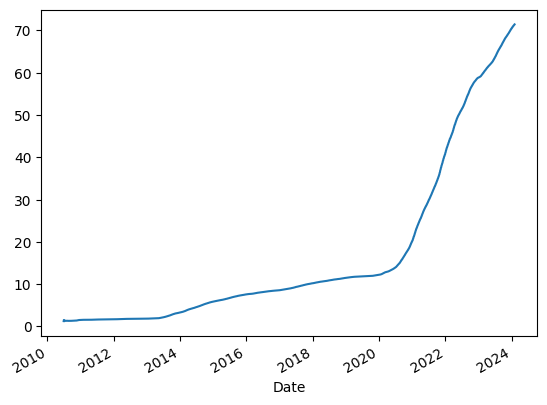

In [8]:
df_tesla['Open: CMA'] = df_tesla['Open'].expanding().mean()
df_tesla['Open: CMA'].plot()

### Exponential Moving Average

In [9]:
# Smoothening factor : 0.3 i.e multiplying factor, Span is rolling window size, 5 in this case
df_tesla['Open: EMA_window_size_5'] = df_tesla['Open'].ewm(span = 5).mean()

<Axes: xlabel='Date'>

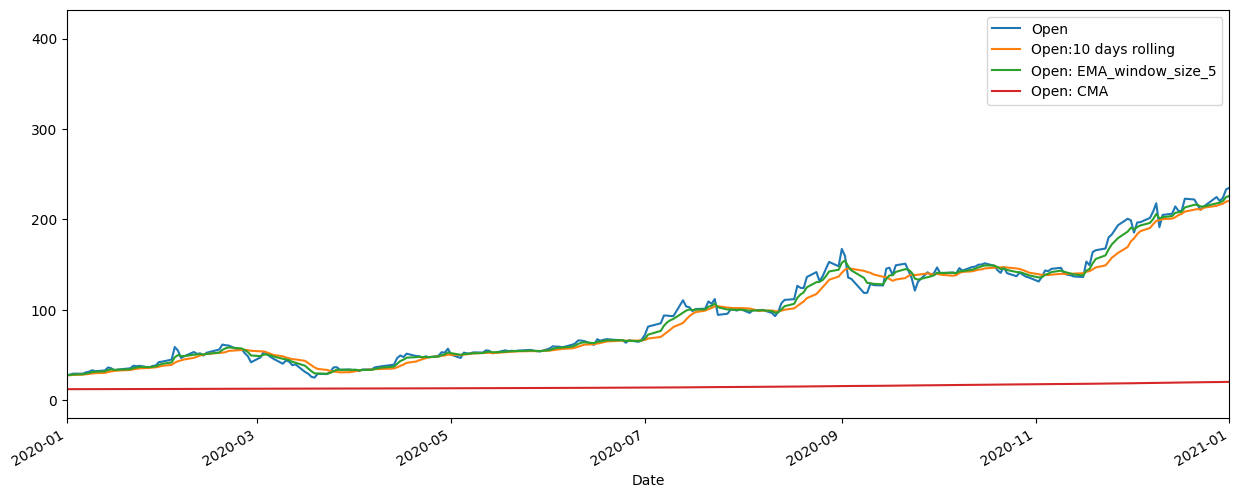

In [10]:
# df_tesla[['Open' , 'Open:10 days rolling', 'Open:30 days rolling','Open:50 days rolling','EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))
df_tesla[['Open' , 'Open:10 days rolling','Open: EMA_window_size_5','Open: CMA']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

**As seen in the above plot, EMA does not have much lag compared to SMA but CMA has maximum amount of lag**